## Basic imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


## Linear Regression

### Read data

In [2]:
regression_data = pd.read_csv('regression_data.csv', header = None)

### Plot data

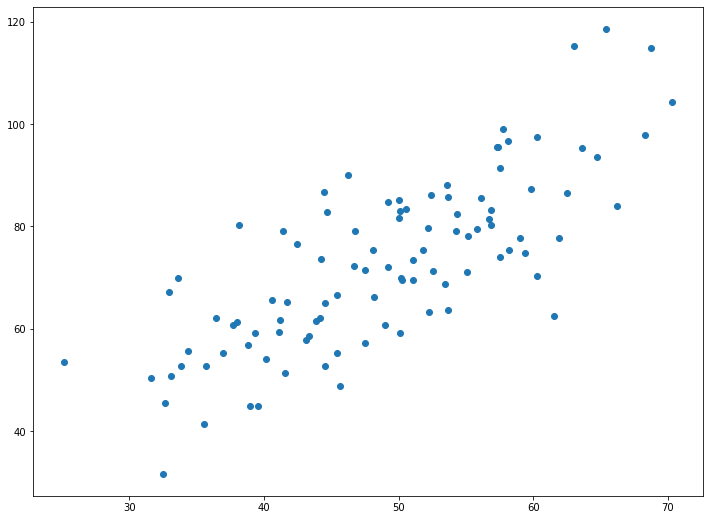

In [3]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
X = regression_data.iloc[:, 0]
Y = regression_data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

### Calculate coefficients with gradient descent

In [20]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4777440851894448 0.08893651993741342


### Plot regression line

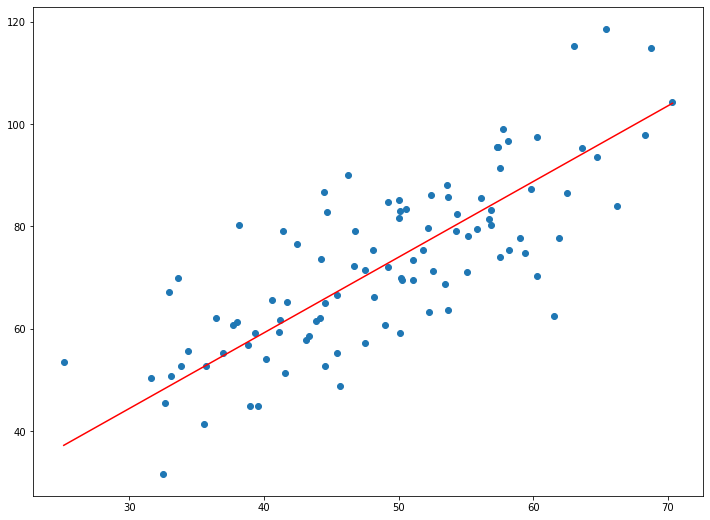

In [21]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

## Decision Tree

### Read data

In [23]:
#the dataset is available on kaggle too
tree_data = pd.read_csv('tree_data.csv')

#check for missing values
tree_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Clean data

In [24]:
tree_data.dropna(inplace=True)

In [25]:
tree_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Impute categorical variables

In [26]:
# I selected few of the columns from the tree_dataset for this tutorial
tree_data = tree_data[['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Status']]

tree_data['Gender'] = tree_data['Gender'].replace(to_replace='Male', value='1')
tree_data['Gender'] = tree_data['Gender'].replace(to_replace='Female', value='0')


tree_data['Married'] = tree_data['Married'].replace(to_replace='Yes', value='1')
tree_data['Married'] = tree_data['Married'].replace(to_replace='No', value='0')


tree_data['Self_Employed'] = tree_data['Self_Employed'].replace(to_replace='No', value='0')
tree_data['Self_Employed'] = tree_data['Self_Employed'].replace(to_replace='Yes', value='1')


tree_data['Education'] = tree_data['Education'].replace(to_replace='Graduate', value='1')
tree_data['Education'] = tree_data['Education'].replace(to_replace='Not Graduate', value='0')

### Split data into train/test

In [27]:
X_tree = tree_data.drop(columns=['Loan_Status'])
y_tree = tree_data['Loan_Status']


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

### Build the model

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

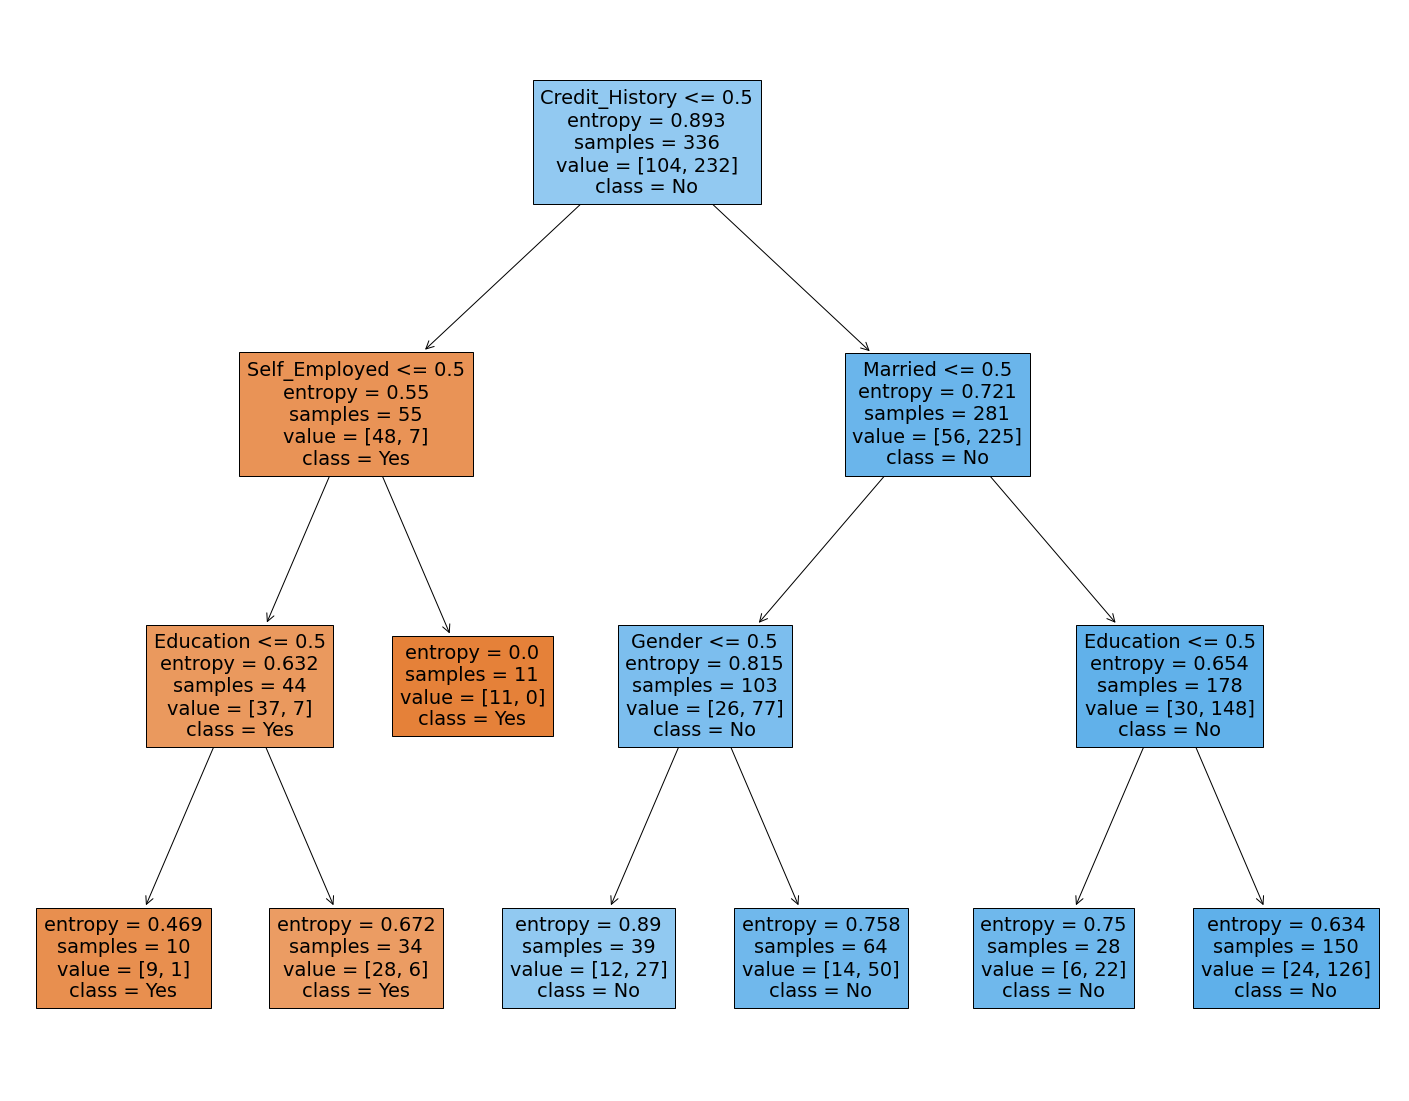

In [30]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, feature_names=['Gender','Married','Education','Self_Employed','Credit_History'],
                               class_names=['Yes','No'], filled=True)

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=3, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=50,
                       random_state=0)

### Visualise tree

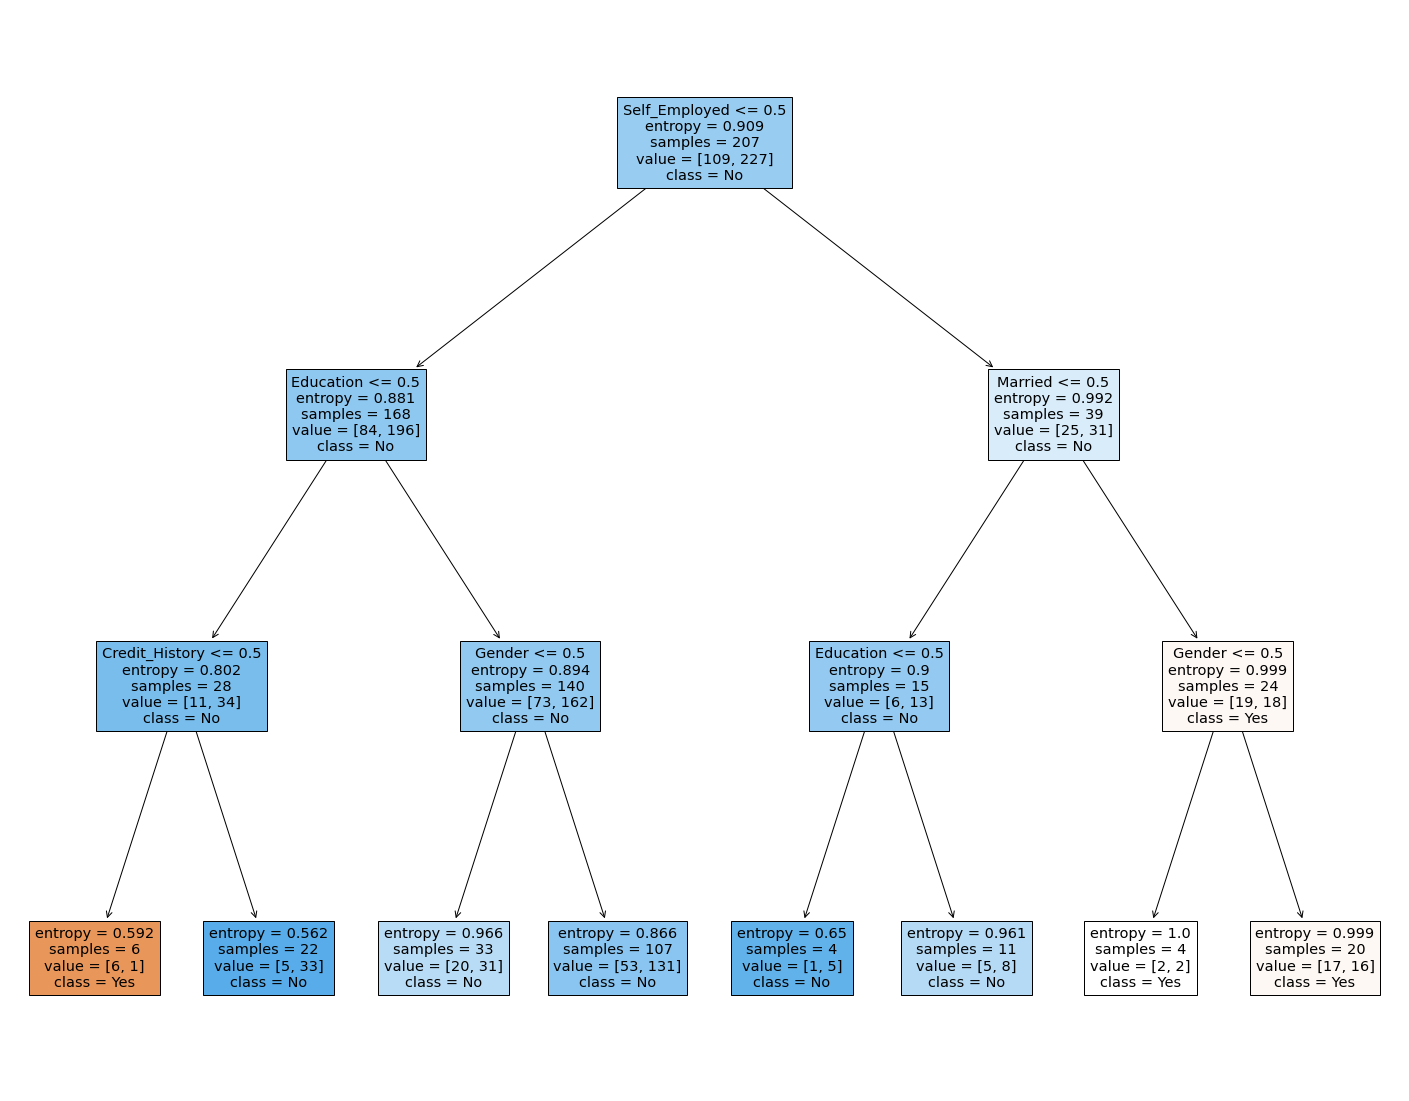

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf.estimators_[10], feature_names=['Gender','Married','Education','Self_Employed','Credit_History'],
                               class_names=['Yes','No'], filled=True)